<a href="https://colab.research.google.com/github/gastonbujia/curso-visualizacion-datos-SAN-2022/blob/main/notebooks/SAN_dia_2/solucion/Attentional_Blink_Resuelto.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Attentional Blink


> El Attentional Blink (AB) es el fenómeno en el cual el segundo de dos targets no puede ser detectado o identificado cuando aparece cercano en tiempo con respecto al perimero

<center>
<img src = 'https://onlinelibrary.wiley.com/cms/asset/b6d5a4c9-42b2-46d0-9a11-61012b98dbfe/cxo_160_f1.gif'>  
</center>



**Fuente:** http://www.scholarpedia.org/article/Attentional_blink

## Los datos que tenemos

Para el siguiente ejercicio nos basamos en los datos publicados con el trabajo 

*Zivony, A., Shanny, S., & Lamy, D. (2018). Perceptual processing is not spared during the attentional blink. Journal of cognition, 1(1).* [LINK](https://www.ncbi.nlm.nih.gov/pmc/articles/PMC6634390/)

Para bajarse los datos crudos pueden entrar acá → [LINK](https://figshare.com/articles/dataset/Data/5492611)

**Nota:** para mejorar la experiencia de éste curso los datos que vamos a analizar no son los originales. Algunas modificaciones fueron hechas para aumentar la cantidad de datos y tener una curva de AB más completa. Es decir, no hay que tomar estos datos como resultantes de un experimento real, sino como un dataset de juguete.

# Cargar la planilla

Como ya vimos, dependiendo de qué formato tengamos, podemos usar diferentes funciones.

Pandas es muy versatil y tiene muchas opciones para diferentes casos. 

Además Colab tiene la posibilidad de cargar directo desde Drive

Y también podemos usar funciones de la consola de linux (recuerden que Colab nos habilita una computadora que corre un Linux de fondo)

In [ ]:
import pandas as pd
import numpy as np
from google.colab import drive

## Cargar un csv desde Drive

Si tengo el archivo que necesito en un Google Drive al que tengo acceso:

1.   *Montar* el drive
2.   Una vez montado se nos crea una carpera `/content/drive/`
3.   Dentro de esa carpeta tenemos acceso a todos los archivos del drive

Detalle: esto también se puede hacer en tu computadora con linux (supongo que con otros Sistemas Operativos también) y a diferencia de Dropbox no te descarga todo el contenido de Drive, sino que lo linkea a la nube y descarga sólo los archivos que querés usar. Esto tiene ventajas y desventajas.

In [ ]:
drive.mount('/content/drive')
df=pd.read_csv('/content/drive/MyDrive/1_Docencia/2022_08_Curso SAN/dato attentional blink/dataAB_SAN.csv')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


Si quisiera también podría subir archivos a esta computadora y cargarlos desde ahí.


## En caso de no tenerlo en Drive (o no querer tenerlo)

En el panel de la izquierda pueden acceder a la carpeta de la computadora y cargar todos los archivos que quieran y cargarlos esde ahí 

`df=pd.read_csv('/content/dataAB_SAN.csv')`

# Calcular las columnas Faltantes

Nuestro dataset tiene mucha información sobre el experimento y las respuestas de les participantes, pero nos faltan algunas columnas para poder analiazar los resultados. Necesitamos calcularlas:


In [ ]:
# ¿qué columnas tiene el dataframe?
df.columns

Index(['Unnamed: 0', 'Subject', 'Age', 'Sex', 'Block', 'blockType', 'practice',
       'Trial', 'RSVP_String_01', 'RSVP_String_02', 'RSVP_String_03',
       'RSVP_String_04', 'RSVP_String_05', 'RSVP_String_06', 'RSVP_String_07',
       'RSVP_String_08', 'RSVP_String_09', 'RSVP_String_10', 'RSVP_String_11',
       'RSVP_String_12', 'RSVP_String_13', 'RSVP_String_14', 'RSVP_String_15',
       'RSVP_String_16', 'RSVP_String_17', 'RSVP_String_18', 'T1Place',
       'T1side', 'T2Place', 'T2_RESP', 'T2_RT', 'T1_CRESP', 'T1_RESP',
       'T1_RT'],
      dtype='object')


### Ejercicios

**T1_T2_lag:** Diferencia entre la posición de los dos targets (*T2Place* y *T1Place*) 

**T1_CRESP:** Respuesta correcta al primer target. En la columna *T1side* tenemos indicado si el estimulo apuntaba a izquierda (*Left*) o a derecha (*Right*), pero la respuesta de les sujetes indica qué tecla tocaron ["z","x"]. Para poder trabajar más cómodes hagamos la columna *T1_CRESP* que nos indique la respuesta correcta en función de la tecla que tenía que tocar ele sujete.

**T1_ACC:** Correctitud de la respuesta al target 1 (*T1_RESP*) en base a la respuesta correcta (*T1_CRESP*) 

**T2_CRESP:** Respuesta correcta al segundo target. Calcularlo en base a *T2Place* y las columnas *RSVP_String_NN*.
Este es un poco más dificil. Ya no es una operacion entre columnas, sino que tenemos que generar 1 nueva columna en base a elementos de diferentes (dependiendo de otra cosa)

**T2_ACC:** Correctitud de la respuesta al target 2 (*T2_RESP*) en base a la respuesta correcta (*T2_CRESP*).

In [ ]:
# Calcular el lag entre el T1 y el T2
df["T1_T2_lag"] = None

In [ ]:
#### Solución ####
df["T1_T2_lag"] = df["T2Place"] - df["T1Place"]

In [ ]:
# Calcular rta correra a T1
df["T1_CRESP"] = None

In [ ]:
#### Solución ####

# 1er estímulo
# Tenemos el respuesta correcta en "T1side", pero en término de "left" y "rigth"
# La respuesta que da el sujetx está en "T1_RESP", en términos de "z", "x". 
# Pasemos todo al mismo idioma

mapeo = {"left":"z", "right":"x"}
df["T1_CRESP"] = [mapeo[k] for k in df["T1side"]]

In [ ]:
# Calcular correctitud de T1
df["T1_ACC"] = None

In [ ]:
#### Solución ####

# Ahora, calcular si acertó T1 es fácil

df["T1_ACC"] = df["T1_CRESP"] == df["T1_RESP"]

In [ ]:
# Calcular rta correra a T2
df["T2_CRESP"] = None

In [ ]:
#### Solución 1 ####

%%timeit
# 2do estímulo
# La respuesta correcta es el dígito que mostramos
# Sabemos qué número de estímulo es el target (T2Place)
# Y tenemos todos los estímulo en las columnas RSVP_String_NN

# Forma 1: for
df["T2_CRESP_1"] = 0
for i,row in df.iterrows():
  n=int(row["T2Place"])
  columna = f"RSVP_String_{n:02d}"
  df.at[i, 'T2_CRESP_1'] = row[columna]

1.33 s ± 24.3 ms per loop (mean ± std. dev. of 7 runs, 1 loop each)


In [ ]:
#### Solución 2 ####

%%timeit
# Forma 2: for

T2_CRESP = []
for i,row in df.iterrows():
  n=int(row["T2Place"])
  columna = f"RSVP_String_{n:02d}"
  T2_CRESP.append(row[columna])

df["T2_CRESP_2"] = T2_CRESP


1.03 s ± 7.74 ms per loop (mean ± std. dev. of 7 runs, 1 loop each)


In [ ]:
# Calcular correctitud de T2
df["T2_ACC"] = None

In [ ]:
#### Solución ####

# Ahora, calcular si acertó T2 es fácil

df["T2_ACC"] = df["T2_CRESP_1"] == df["T2_RESP"]

# Histogramas

Pandas tiene incorporado métodos para algunos gráficos sencillos, como histogramas.

Podes ver la documentación acá:
https://pandas.pydata.org/docs/reference/api/pandas.DataFrame.hist.html



## Ejercicios
**1. Crear un histograma de las edades**

In [ ]:
# 1. histograma 

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7f12d20f2d90>]],
      dtype=object)

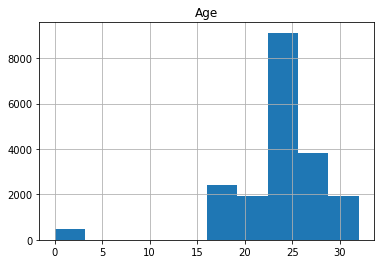

In [ ]:
#### Solución ####

df.hist(column="Age")

**2. Sacarle la grilla y setear la cantidad de bines en 15**

In [ ]:
# 2. histograma sin grilla y con 15 bines

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7f12d2187f10>]],
      dtype=object)

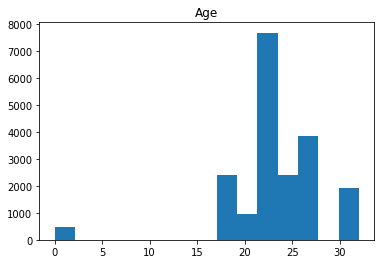

In [ ]:
#### Solución ####
df.hist(column="Age",
        grid=False, bins=15)

**3. Al histograma del punto 2 dividirlo por sexo**

In [ ]:
# 3. histograma por sexo

array([<matplotlib.axes._subplots.AxesSubplot object at 0x7f12d1bdc110>,
      dtype=object)

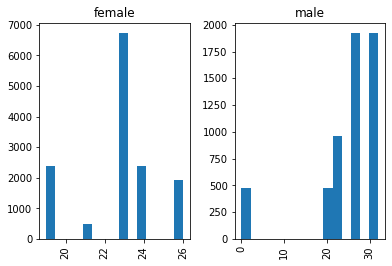

In [ ]:
#### Solución ####

df.hist(column="Age",
        by = "Sex",
        grid=False, bins=15)

**4. En lugar de fijar la *cantidad* de bins fijar los limites de los bins**

In [ ]:
# 4. Histograma con limites de los bins fijos 

# Filtrado de datos

Casi siempre nuestros datos tienen material extra que no queremos analizar y es necesario limpiarlos. En este caso podemos identificar algunos datos que nos podría interesar mirar por separado.

1. Participantes con edad 0
2. Trials de práctica
3. Trials de un experimento 2 (definido como `COLOR`) que no nos interesan

## Ejercicios

**1. Crear `df_filtrado` eliminando los datos con edad 0. Hacer un histograma con las edades del dataframe resultante**




In [ ]:
# filtrar por edad == 0
df_filtrado = None

# Hacer hist de df_filtrado

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7f12d1aaec50>]],
      dtype=object)

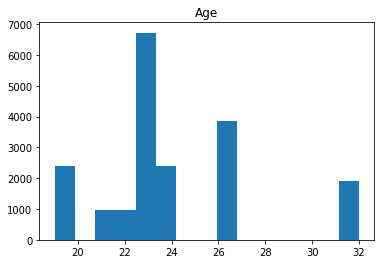

In [ ]:
#### Solución ####

df_filtrado = df[df.Age != 0]
df_filtrado.hist(column="Age",
        grid=False, bins=15)

**2. Filtrar Trials de práctica y 2do Experimento**



> El experimento se dividió en 60 trials de práctica y 60 de no-práctica. Además la tabla tiene datos de 2 experimentos, nos interesa solo los que son del blockType "DIGIT"

In [ ]:
# Crear un nuevo df_filtrado (pisando el otro)
df_filtrado = None


In [ ]:
#### Solución ####

df_filtrado = df[(df["practice"] != 1) & (df.blockType == "DIGIT")] 

# Calcular proporción de aciertos 




## Ejercicios
**1. Calcular la probabilidad de haber acertado T1**

**2. Calcular la probabilidad de haber acertado T2**


In [ ]:
# Prob de acierto de T1
print("Prob. T1:", None)

# Prob de acierto de T2
print("Prob. T2:", None)

Prob. T1: None
Prob. T2: None


In [ ]:
#### Solución ####

print("Prob. T1:", np.mean(df_filtrado["T1_ACC"]))
print("Prob. T2:", np.mean(df_filtrado["T2_ACC"]))

Prob. T1: 0.8780505952380953
Prob. T2: 0.6085565476190476


La probabilidad de acierto de T2 que acabamos de calcular debería tener en cuenta sólo los casos donde tambiñen acertó T1 (recordemos que el AB es ver/no-ver T2 dado que se vio T1)

**3. Cacular el acierto condicional de T2 dado que se acertó T1**

In [ ]:
# Calcular el acerito condicional de T2 dado T1

df_filtrado["T2_ACC_condicional"] = None

In [ ]:
#### Solución ####

df_filtrado["T2_ACC_condicional"] = df_filtrado["T2_ACC"] & df_filtrado["T1_ACC"]

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  This is separate from the ipykernel package so we can avoid doing imports until


**4. Calcular la probailidad condicional de T2 dado T1**

In [ ]:
print("Prob. T2|T1:", None)

In [ ]:
#### Solución ####

print("Prob. T2|T1:", np.mean(df_filtrado["T2_ACC_condicional"]))


Prob. T2|T1: 0.5939732142857143


Si vamos a ver los gráficos que suele haber de AB veremos que lo interesante está en analizar la probabilidad condicional de T2 dado T1 en función de la distancia entre los targets

<img src = 'https://www.researchgate.net/profile/Philip-Barnard/publication/228783378/figure/fig5/AS:668347536523275@1536357878276/The-basic-Attentional-Blink-effect-for-letter-stimuli-adapted-from-Raymond-et-al.ppm'>  


**5. Agrupar el dataframe por sujetos y lag, calculando la media de todas las columnas**

In [ ]:
df_sujs = None

In [ ]:
#### Solución ####

df_sujs = df_filtrado.groupby(["Subject","T1_T2_lag"])["T1_ACC","T2_ACC_condicional"].mean()


**6. Ahora agrupar solo por lag calculando media y error standar (sem).**

Haber hecho el groupby en dos partes (primero dentro de sujetos y después entre sujetos) nos permite calcular el sem que queremos para la estadística (que no vamos a hacer acá).

In [ ]:
df_agg = None

In [ ]:
#### Solución ####

df_agg = df_sujs.groupby("T1_T2_lag")["T1_ACC","T2_ACC_condicional"].agg(["mean","sem"]).reset_index()

# Graficar el AB

Llegamos! Ahora ya podemos graficar nuestro AB

Si hicimos todo bien la siguiente celda nos tiene que dar el gráfico esperado

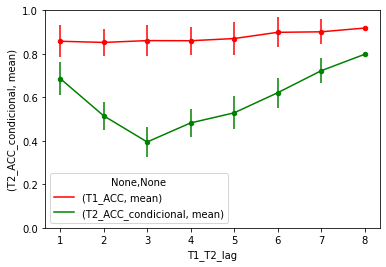

In [ ]:
ax1 = df_agg.plot(kind='scatter', x="T1_T2_lag", y=('T1_ACC','mean'), color='r')    
df_agg.plot(kind='scatter', x="T1_T2_lag", y=('T2_ACC_condicional','mean'), color='g', ax=ax1)
df_agg.plot(kind='line', x="T1_T2_lag", y=('T1_ACC','mean'), color='r', ax=ax1, yerr=df_agg[('T2_ACC_condicional','sem')])
df_agg.plot(kind='line', x="T1_T2_lag", y=('T2_ACC_condicional','mean'), color='g', ax=ax1, yerr=df_agg[('T2_ACC_condicional','sem')],ylim=[0,1])
